## Question_10_Solution:

**Q-10** An Ad- Agency analyzed a dataset of online ads and used a machine learning
model to predict whether a user would click on an ad or not.
Dataset This is the Dataset You can use this dataset for this question.

In [10]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 167.3 kB/s eta 0:00:00m eta 0:00:010:01:01


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', 0)
plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format
import math
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import random
import gzip
import category_encoders as ce
pd.options.display.float_format = '{:.2f}'.format


In [5]:
# Click-Through Rate Prediction:
df = pd.read_csv('useful/Q10.csv')
df.head(2)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10075494752753487847,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,18993,320,50,2161,0,35,100048,157
1,10104381554256712619,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79


In [6]:
df.shape

(20000, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20000 non-null  uint64
 1   click             20000 non-null  int64 
 2   hour              20000 non-null  int64 
 3   C1                20000 non-null  int64 
 4   banner_pos        20000 non-null  int64 
 5   site_id           20000 non-null  object
 6   site_domain       20000 non-null  object
 7   site_category     20000 non-null  object
 8   app_id            20000 non-null  object
 9   app_domain        20000 non-null  object
 10  app_category      20000 non-null  object
 11  device_id         20000 non-null  object
 12  device_ip         20000 non-null  object
 13  device_model      20000 non-null  object
 14  device_type       20000 non-null  int64 
 15  device_conn_type  20000 non-null  int64 
 16  C14               20000 non-null  int64 
 17  C15         

In [8]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [14]:
# hour column contains event date with all the details, extracting the same to create different columns.

df['hour'] = pd.to_datetime(df['hour'])
df['month'] = df['hour'].dt.month
df['dayofweek'] = df['hour'].dt.dayofweek
df['day'] = df['hour'].dt.day
df['hour_time'] = df['hour'].dt.hour
df.head(2)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
0,10075494752753487847,0,1970-01-01 00:00:00.014102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,f95efa07,a99f214a,eee08cba,89416188,1,0,18993,320,50,2161,0,35,100048,157,1,3,1,0
1,10104381554256712619,0,1970-01-01 00:00:00.014102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,433bff52,d17a0181,1,0,15702,320,50,1722,0,35,-1,79,1,3,1,0


In [16]:
# checking the sum of the null values across all cloumns and rows.

df['hour'].isnull().sum().sum()

0

In [17]:
# info on each column of training dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                20000 non-null  uint64        
 1   click             20000 non-null  int64         
 2   hour              20000 non-null  datetime64[ns]
 3   C1                20000 non-null  int64         
 4   banner_pos        20000 non-null  int64         
 5   site_id           20000 non-null  object        
 6   site_domain       20000 non-null  object        
 7   site_category     20000 non-null  object        
 8   app_id            20000 non-null  object        
 9   app_domain        20000 non-null  object        
 10  app_category      20000 non-null  object        
 11  device_id         20000 non-null  object        
 12  device_ip         20000 non-null  object        
 13  device_model      20000 non-null  object        
 14  device_type       2000

In [18]:
# No null values found in the dataset.

df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour_time           0
dtype: int64

In [19]:
# looks like following columns have outliers  C15, C16, C19, C21. 

df.describe()


,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
count,20000.00,20000.00,20000,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,10399751658321162240.00,0.17,1970-01-01 00:00:00.014102100,1005.05,0.20,1.06,0.20,17721.32,318.35,56.99,1969.18,0.79,130.21,38081.48,88.36,1.00,3.00,1.00,0.00
min,1175770906635967.00,0.00,1970-01-01 00:00:00.014102100,1001.00,0.00,0.00,0.00,375.00,216.00,36.00,112.00,0.00,33.00,-1.00,13.00,1.00,3.00,1.00,0.00
25%,10487313730136186880.00,0.00,1970-01-01 00:00:00.014102100,1005.00,0.00,1.00,0.00,15704.00,320.00,50.00,1722.00,0.00,35.00,-1.00,61.00,1.00,3.00,1.00,0.00
50%,11242698058924595200.00,0.00,1970-01-01 00:00:00.014102100,1005.00,0.00,1.00,0.00,17654.00,320.00,50.00,1993.00,0.00,35.00,-1.00,79.00,1.00,3.00,1.00,0.00
75%,11987884082089066496.00,0.00,1970-01-01 00:00:00.014102100,1005.00,0.00,1.00,0.00,20362.00,320.00,50.00,2307.00,2.00,39.00,100083.00,117.00,1.00,3.00,1.00,0.00
max,12761164181180454912.00,1.00,1970-01-01 00:00:00.014102100,1010.00,5.00,5.00,5.00,21705.00,728.00,480.00,2497.00,3.00,1835.00,100248.00,157.00,1.00,3.00,1.00,0.00
std,3126591016936709120.00,0.38,NaN,1.11,0.40,0.60,0.64,3168.51,11.04,37.52,387.40,1.23,240.72,48598.80,45.23,0.00,0.00,0.00,0.00


In [21]:
# Dealing with outliers by capping

col = ['C15', 'C16', 'C19', 'C21']
for col in col:
    percentiles = df[col].quantile(0.98)
    if df[col].quantile(0.98) < 0.5 * df[col].max():
        df[col][df[col] >= percentiles] = percentiles


In [22]:
# segrigating numerical and categorical variables.

numerical = []
categorical = []

for col in (df.columns):
    if df[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['id', 'click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour_time']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


click
0   0.83
1   0.17
Name: proportion, dtype: float64




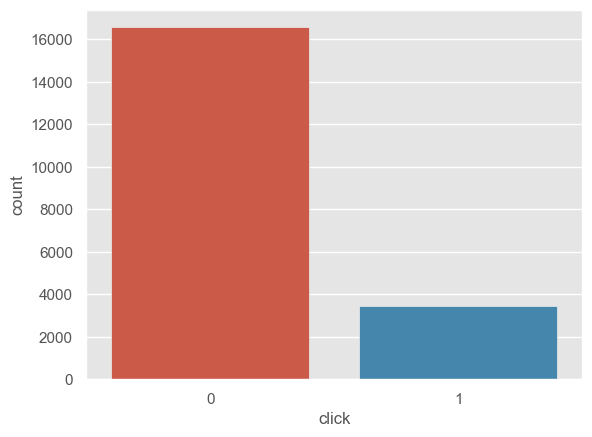

In [23]:
# y is the target variable, analysing the same.
# 83% values are 0 and 17% values are 1. data is highly imbalance. 

print(df.click.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x='click', data=df)
plt.show()

## Analysing categorical variables.

In [24]:
print("unique counts of site_id", len(df['site_id'].unique()))
print("----------------------")
print(df['site_id'].value_counts(normalize = True))


unique counts of site_id 497
----------------------
site_id
1fbe01fe   0.35
85f751fd   0.22
543a539e   0.07
d9750ee7   0.04
e151e245   0.03
           ... 
f1b5c97e   0.00
14ec6216   0.00
ffcb6b9a   0.00
b8561528   0.00
de849fbf   0.00
Name: proportion, Length: 497, dtype: float64


In [25]:
print("unique counts of site_domain", len(df['site_domain'].unique()))
print("----------------------")
print(df['site_domain'].value_counts(normalize = True))


unique counts of site_domain 415
----------------------
site_domain
f3845767   0.35
c4e18dd6   0.23
c7ca3108   0.07
98572c79   0.04
7e091613   0.03
           ... 
0b204815   0.00
a124cf19   0.00
aa785047   0.00
f27ccfdf   0.00
0316bf4f   0.00
Name: proportion, Length: 415, dtype: float64


In [26]:
print("unique counts of site_category", len(df['site_category'].unique()))
print("----------------------")
print(df['site_category'].value_counts(normalize = True))

unique counts of site_category 14
----------------------
site_category
28905ebd   0.38
50e219e0   0.25
f028772b   0.20
3e814130   0.13
76b2941d   0.02
335d28a8   0.01
0569f928   0.01
72722551   0.00
f66779e6   0.00
75fa27f6   0.00
c0dd3be3   0.00
bcf865d9   0.00
a818d37a   0.00
110ab22d   0.00
Name: proportion, dtype: float64


In [27]:
print("unique counts of app_id", len(df['app_id'].unique()))
print("----------------------")
print(df['app_id'].value_counts(normalize = True))


unique counts of app_id 398
----------------------
app_id
ecad2386   0.78
febd1138   0.02
e2fcccd2   0.02
5e3f096f   0.01
0acbeaa3   0.01
           ... 
b3406a18   0.00
0e1429fd   0.00
6f8bcb0f   0.00
b80746a0   0.00
4fa8a7a9   0.00
Name: proportion, Length: 398, dtype: float64


In [28]:
print("unique counts of app_domain", len(df['app_domain'].unique()))
print("----------------------")
print(df['app_domain'].value_counts(normalize = True))

unique counts of app_domain 38
----------------------
app_domain
7801e8d9   0.83
2347f47a   0.07
82e27996   0.02
d9b5648e   0.02
5c5a694b   0.02
45a51db4   0.01
aefc06bd   0.01
ae637522   0.00
0654b444   0.00
33da2e74   0.00
885c7f3f   0.00
b9528b13   0.00
5b9c592b   0.00
b5f3b24a   0.00
c6824def   0.00
5c620f04   0.00
ad63ec9b   0.00
f2f777fb   0.00
43cf4f06   0.00
6f7ca2ba   0.00
813f3323   0.00
828da833   0.00
df32afa9   0.00
afdf1f54   0.00
3feeed1e   0.00
b8d325c3   0.00
18eb4e75   0.00
1ed56ded   0.00
db829551   0.00
56eabb45   0.00
5ac0b939   0.00
f3ad7798   0.00
15ec7f39   0.00
e787a6bc   0.00
e5d5313f   0.00
713c0c91   0.00
2b627705   0.00
b2816726   0.00
Name: proportion, dtype: float64


In [29]:
print("unique counts of app_category", len(df['app_category'].unique()))
print("----------------------")
print(df['app_category'].value_counts(normalize = True))

unique counts of app_category 15
----------------------
app_category
07d7df22   0.79
0f2161f8   0.15
f95efa07   0.03
8ded1f7a   0.01
cef3e649   0.01
75d80bbe   0.00
4ce2e9fc   0.00
d1327cf5   0.00
dc97ec06   0.00
a3c42688   0.00
09481d60   0.00
fc6fa53d   0.00
0f9a328c   0.00
879c24eb   0.00
a86a3e89   0.00
Name: proportion, dtype: float64


In [30]:
print("unique counts of device_id", len(df['device_id'].unique()))
print("----------------------")
print(df['device_id'].value_counts(normalize = True))

unique counts of device_id 2039
----------------------
device_id
a99f214a   0.87
c357dbff   0.00
3c0208dc   0.00
a167aa83   0.00
24c3c3fe   0.00
           ... 
9eb6088e   0.00
ed61965a   0.00
f7e2a32a   0.00
6b38d0ca   0.00
1da01e67   0.00
Name: proportion, Length: 2039, dtype: float64


In [31]:
print("unique counts of device_ip", len(df['device_ip'].unique()))
print("----------------------")
print(df['device_ip'].value_counts(normalize = True))

unique counts of device_ip 12777
----------------------
device_ip
6b9769f2   0.01
ceffea69   0.00
9b1fe278   0.00
75bb1b58   0.00
0489ce3f   0.00
           ... 
f0187052   0.00
1843175d   0.00
c7817d6f   0.00
1477504f   0.00
6dc742ab   0.00
Name: proportion, Length: 12777, dtype: float64


In [32]:
print("unique counts of device_model", len(df['device_model'].unique()))
print("----------------------")
print(df['device_model'].value_counts(normalize = True))

unique counts of device_model 1552
----------------------
device_model
8a4875bd   0.07
d787e91b   0.05
1f0bc64f   0.04
4ea23a13   0.02
711ee120   0.02
           ... 
4f18ef0b   0.00
3fa7d4fb   0.00
42098d1b   0.00
a4b93048   0.00
3983e343   0.00
Name: proportion, Length: 1552, dtype: float64


### observations :

- All categorical variables have lot of unique values in it, one hot encoding is not a scalable approach.
- we will go with label encoding and scaling approach is a better idea for this.


In [33]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek',
       'day', 'hour_time'],
      dtype='object')

In [36]:
df1 = df[numerical]

Text(0.5, 1.05, 'Pearson correlation of Features')

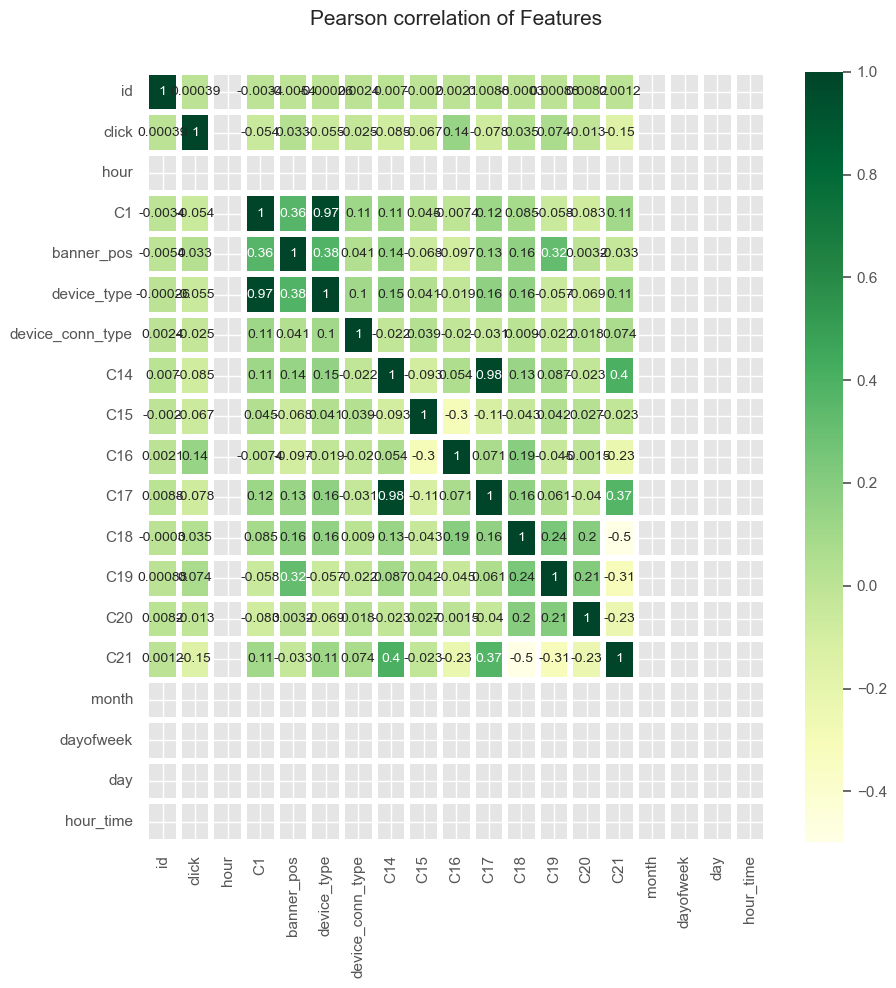

In [37]:
# Pearson correlation table to find the relationship with output with all input features. 

corr = df1.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

### observation

- month has got no significance, better to drop it
- y and click are same drop click column
- C14 and C17 are highly co-related, later will remove one of them after the base model.
- device type with C1 are highly co-related, later will remove one of them after the base model.
- Removing C20 anomalised column, since it have got nearly 47% of values with -1. As a categorical variable it's not expected to have values as -1.


In [38]:
df.drop(['month', 'C20'], axis=1, inplace=True)
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C21', 'dayofweek', 'day',
       'hour_time'],
      dtype='object')

# Data preperation

In [39]:
# id column have a unique columns so, keeping that don't proive any significance,hence dropping.
# hour column have been derived into different columns, hence dropping. 
# rename click to y (output)
# after dropping hour column, hour_time can be made as hour

df.drop(['id', 'hour'], axis = 1, inplace = True) 
df.rename(columns={'click': 'y',
                   'hour_time': 'hour'},
          inplace=True, errors='raise')

df.columns


Index(['y', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C21', 'dayofweek', 'day', 'hour'],
      dtype='object')

In [40]:
# split inputs and lable:
X = df.drop(['y'], axis=1)
y = df['y']

y
0   0.83
1   0.17
Name: proportion, dtype: float64




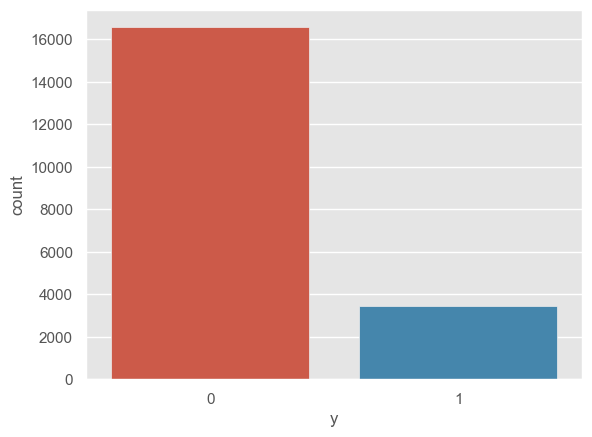

In [41]:
# After taking the sample of data, still the ratio of output remains same.

print(df.y.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x=y)
plt.show()

In [42]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
0,1005,0,0.10,0.11,0.12,0.11,0.11,0.14,0.18,0.15,0.20,1,0,18993,320,50,2161,0,35,157,3,1,0
1,1005,0,0.20,0.20,0.20,0.19,0.19,0.19,0.18,0.15,0.26,1,0,15702,320,50,1722,0,35,79,3,1,0


In [47]:
# train-test-split:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)


In [48]:
# this function helps in evaluation the given model and provide accuracy and confusion matrix. 

def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #print(accuracy)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    #print(cnf_matrix)
    #metrics.plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    return accuracy, cnf_matrix

In [49]:
# Plots the ROC curve and returns false positive rate, true positive rate, and thresholds. 

def draw_roc(model, Xtest, actual):
    probs = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds


In [50]:
# Returns the ctossvalidation score for given number of n folds. 

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation


In [51]:
# this stores the results in dataframe for evaluating the final result. 

def store_results(name, ytrain, xtrain, ytest, xtest, model, folds):
    
    crossvalidation = cross_val(model, xtrain, ytrain, folds)
    
    accuracy_test, cm1 =  model_eval(model, xtrain, ytrain)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)
    
    accuracy_train, cm1 =  model_eval(model, xtest, ytest)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)

    entry = {'Model': [name],
          'Accuracy_train': [accuracy_train],
          'recall_train': [recall_train],
          'precision_train': [precision_train],
          'Accuracy_test': [accuracy_train],
          'recall_test': [recall_train],
          'precision_test': [precision_train],
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result

In [52]:
# Scaling:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
14019,0.44,0.20,0.28,0.29,0.58,0.54,0.63,1.00,0.36,0.52,0.51,0.20,0.00,0.95,1.00,0.03,0.86,0.00,0.00,1.00,0.00,0.00,0.00
17667,0.44,0.00,0.29,0.29,0.74,0.54,0.63,1.00,0.36,0.52,0.46,0.20,0.00,0.93,1.00,0.03,0.92,0.00,0.07,0.02,0.00,0.00,0.00
1465,0.44,0.20,0.24,0.22,1.00,0.54,0.63,1.00,0.36,0.52,0.27,0.20,0.00,0.74,1.00,0.03,0.71,1.00,0.07,0.07,0.00,0.00,0.00
8507,0.44,0.00,0.06,0.06,0.13,0.54,0.63,1.00,0.36,0.34,0.26,0.20,0.00,0.87,1.00,0.03,0.86,0.00,0.00,1.00,0.00,0.00,0.00
6238,0.44,0.20,0.18,0.18,1.00,0.54,0.63,1.00,0.36,0.33,0.48,0.20,0.00,0.91,1.00,0.03,0.89,0.00,0.36,0.24,0.00,0.00,0.00


In [53]:
# Using Logistic Regression model:
model = LogisticRegression()
model.fit(X_train, y_train)

X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])


In [57]:
# Prediciton:
y_pred = model.predict(X_test)
accuracy, cnf_matrix = model_eval(model, X_test, y_test)
print('LogisticRegression Accuracy: ', accuracy*100, '%')
print(cnf_matrix)

LogisticRegression Accuracy:  94.01666666666667 %
[[4869  100]
 [ 259  772]]
